In [ ]:
import pandas as pd
 
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/training_set_label.csv" )

In [ ]:
data.head()

,VWTI,SWTI,CWTI,EI,Class
0,2.2634,-4.4862,3.6558,-0.612510,0
1,3.2718,1.7837,2.1161,0.613340,0
2,-3.9411,-12.8792,13.0597,-3.312500,1
3,0.5195,-3.2633,3.0895,-0.984900,0
4,2.5698,-4.4076,5.9856,0.078002,0


In [ ]:
data.isnull().sum()

VWTI     0
SWTI     0
CWTI     0
EI       0
Class    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop("Class",axis=1)
y=data.Class
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train.shape

(876, 4)

In [ ]:
# Imports
import tensorflow as tf  # Importing the TensorFlow Library
from tensorflow import keras  # Import Keras from TensorFlow

from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [ ]:
# Building the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))   
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  

In [ ]:
# Compiling the model
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.001)
model.compile(loss='binary_crossentropy', optimizer= optimizer , metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                160       
_________________________________________________________________
dense_13 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


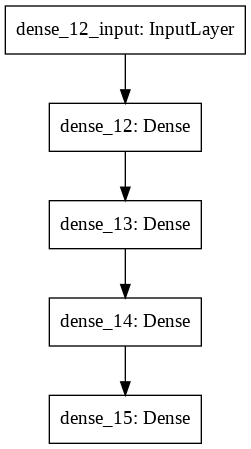

In [ ]:
# plotting the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=1)

Epoch 1/200
70/70 [==============================] - 0s 3ms/step - loss: 0.4261 - accuracy: 0.8071 - val_loss: 0.3004 - val_accuracy: 0.9261
Epoch 2/200
70/70 [==============================] - 0s 1ms/step - loss: 0.1556 - accuracy: 0.9857 - val_loss: 0.0959 - val_accuracy: 0.9943
Epoch 3/200
70/70 [==============================] - 0s 1ms/step - loss: 0.0470 - accuracy: 0.9986 - val_loss: 0.0368 - val_accuracy: 0.9943
Epoch 4/200
70/70 [==============================] - 0s 1ms/step - loss: 0.0159 - accuracy: 1.0000 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 5/200
70/70 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 6/200
70/70 [==============================] - 0s 1ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 7/200
70/70 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 8/200
7

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 4.9152e-10 - accuracy: 1.0000


[4.915223783541478e-10, 1.0]

In [ ]:
import numpy as np
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/testing_set_label.csv')
test_data.head()

,VWTI,SWTI,CWTI,EI
0,-0.40804,0.54214,-0.52725,0.65860
1,-3.71810,-8.50890,12.36300,-0.95518
2,5.50400,10.36710,-4.41300,-4.02110
3,1.68490,8.74890,-1.26410,-1.38580
4,4.74320,2.10860,0.13680,1.65430


In [ ]:
data=np.array(test_data)

In [ ]:
predictions=(model.predict_classes(data)>0.5).astype("int32")

In [ ]:
predictions

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
    

In [ ]:
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
 
# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv')         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>